In [1]:
%matplotlib inline

In [2]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
loss_summary = []
pred = []
grad_norm = []

n_classes = 1
batch_size = 50
nm_epochs = 700
train_num_batches_per_epoch = 1000 // batch_size

In [5]:
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32,[None,1])

In [6]:
def sin_function(source):
    target = np.sin(5. * np.pi * source) / (5. * np.pi * source)
    return target

In [7]:
source = np.arange(1e-6, 1, 0.001).reshape(-1, 1)
target = sin_function(source)

In [8]:
source

array([[1.00000e-06],
       [1.00100e-03],
       [2.00100e-03],
       [3.00100e-03],
       [4.00100e-03],
       [5.00100e-03],
       [6.00100e-03],
       [7.00100e-03],
       [8.00100e-03],
       [9.00100e-03],
       [1.00010e-02],
       [1.10010e-02],
       [1.20010e-02],
       [1.30010e-02],
       [1.40010e-02],
       [1.50010e-02],
       [1.60010e-02],
       [1.70010e-02],
       [1.80010e-02],
       [1.90010e-02],
       [2.00010e-02],
       [2.10010e-02],
       [2.20010e-02],
       [2.30010e-02],
       [2.40010e-02],
       [2.50010e-02],
       [2.60010e-02],
       [2.70010e-02],
       [2.80010e-02],
       [2.90010e-02],
       [3.00010e-02],
       [3.10010e-02],
       [3.20010e-02],
       [3.30010e-02],
       [3.40010e-02],
       [3.50010e-02],
       [3.60010e-02],
       [3.70010e-02],
       [3.80010e-02],
       [3.90010e-02],
       [4.00010e-02],
       [4.10010e-02],
       [4.20010e-02],
       [4.30010e-02],
       [4.40010e-02],
       [4.

In [9]:
target

array([[ 1.00000000e+00],
       [ 9.99958795e-01],
       [ 9.99835350e-01],
       [ 9.99629684e-01],
       [ 9.99341827e-01],
       [ 9.98971822e-01],
       [ 9.98519724e-01],
       [ 9.97985598e-01],
       [ 9.97369526e-01],
       [ 9.96671597e-01],
       [ 9.95891915e-01],
       [ 9.95030595e-01],
       [ 9.94087765e-01],
       [ 9.93063565e-01],
       [ 9.91958145e-01],
       [ 9.90771669e-01],
       [ 9.89504313e-01],
       [ 9.88156265e-01],
       [ 9.86727723e-01],
       [ 9.85218898e-01],
       [ 9.83630014e-01],
       [ 9.81961306e-01],
       [ 9.80213020e-01],
       [ 9.78385414e-01],
       [ 9.76478758e-01],
       [ 9.74493334e-01],
       [ 9.72429434e-01],
       [ 9.70287365e-01],
       [ 9.68067440e-01],
       [ 9.65769989e-01],
       [ 9.63395349e-01],
       [ 9.60943871e-01],
       [ 9.58415916e-01],
       [ 9.55811857e-01],
       [ 9.53132077e-01],
       [ 9.50376971e-01],
       [ 9.47546944e-01],
       [ 9.44642414e-01],
       [ 9.4

In [12]:
def neural_network_model(data): #571
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    hidden_2_layer = {'weights':tf.Variable(tf.truncated_normal([5, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}

    hidden_3_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_4_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_5_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_6_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_7_layer = {'weights':tf.Variable(tf.truncated_normal([10, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([5, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.relu(l6)
    
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.relu(l7)

    output = tf.matmul(l7, output_layer['weights']) + output_layer['biases']

    return output

In [13]:
def next_batch(source, target, batch_size):

   # Shuffle data
   shuffle_indices = np.random.permutation(np.arange(len(target)))
   source = source[shuffle_indices]
   target = target[shuffle_indices]

   for batch_i in range(0, len(source)//batch_size):
      start_i = batch_i * batch_size
      source_batch = source[start_i:start_i + batch_size]
      target_batch = target[start_i:start_i + batch_size]

      yield np.array(source_batch), np.array(target_batch)

In [14]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.square(prediction - y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
    train_step = optimizer.minimize(cost)
    grads_and_vars = optimizer.compute_gradients(cost)
    grads, _ = list(zip(*grads_and_vars))
    gradient_norm = tf.global_norm(grads)

    config=tf.ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.Session(config=config)
    sess.run(tf.global_variables_initializer())

    for epoch in range(nm_epochs):
        epoch_loss = 0.0
        epoch_grads = 0.0
        for epoch_x, epoch_y in next_batch(source, target, batch_size):
            _, c, gradients = sess.run([train_step, cost, gradient_norm], feed_dict={x: epoch_x, y: epoch_y})
            epoch_loss += c / train_num_batches_per_epoch
            epoch_grads += gradients / train_num_batches_per_epoch
        loss_summary.append(epoch_loss)
        grad_norm.append(epoch_grads)
        print('Epoch', epoch, 'completed out of',nm_epochs,'loss:',epoch_loss, 'gradient_norm:', epoch_grads)

    pred.extend(sess.run(prediction, feed_dict={x:source}))
    return pred

In [15]:
prediction = train_neural_network(x)

Epoch 0 completed out of 700 loss: 0.08767792601138355 gradient_norm: 0.06875921681057662
Epoch 1 completed out of 700 loss: 0.08757184464484453 gradient_norm: 0.0749420782784
Epoch 2 completed out of 700 loss: 0.08757918141782284 gradient_norm: 0.06885628320742399
Epoch 3 completed out of 700 loss: 0.0875941900536418 gradient_norm: 0.05431199729646322
Epoch 4 completed out of 700 loss: 0.0875684900209308 gradient_norm: 0.06397817286779171
Epoch 5 completed out of 700 loss: 0.08752464819699526 gradient_norm: 0.04874270737636835
Epoch 6 completed out of 700 loss: 0.08731350880116225 gradient_norm: 0.046528010425390676
Epoch 7 completed out of 700 loss: 0.08565290234982967 gradient_norm: 0.062066622171550984
Epoch 8 completed out of 700 loss: 0.07680175676941872 gradient_norm: 0.0869539897888899
Epoch 9 completed out of 700 loss: 0.056870557833462954 gradient_norm: 0.16176364384591577
Epoch 10 completed out of 700 loss: 0.032308737281709916 gradient_norm: 0.17541876733303072
Epoch 11 com

Epoch 90 completed out of 700 loss: 0.002580564736854285 gradient_norm: 0.037363157002255315
Epoch 91 completed out of 700 loss: 0.0025183414225466542 gradient_norm: 0.03669797219336033
Epoch 92 completed out of 700 loss: 0.0024719870183616877 gradient_norm: 0.03138616648502648
Epoch 93 completed out of 700 loss: 0.002428568428149447 gradient_norm: 0.03185376171022653
Epoch 94 completed out of 700 loss: 0.002414201153442263 gradient_norm: 0.04275098396465182
Epoch 95 completed out of 700 loss: 0.0023275005427422003 gradient_norm: 0.028488824563100937
Epoch 96 completed out of 700 loss: 0.0022575076960492883 gradient_norm: 0.02480664066970348
Epoch 97 completed out of 700 loss: 0.0022289481421466917 gradient_norm: 0.030857216194272046
Epoch 98 completed out of 700 loss: 0.0021552052756305786 gradient_norm: 0.02852795971557498
Epoch 99 completed out of 700 loss: 0.002112833556020633 gradient_norm: 0.032366929738782343
Epoch 100 completed out of 700 loss: 0.002058403065893799 gradient_nor

Epoch 177 completed out of 700 loss: 8.268917190434877e-05 gradient_norm: 0.018994338088668884
Epoch 178 completed out of 700 loss: 8.631681321276119e-05 gradient_norm: 0.023400125699117775
Epoch 179 completed out of 700 loss: 8.280773745354965e-05 gradient_norm: 0.021040885522961614
Epoch 180 completed out of 700 loss: 8.571371145080776e-05 gradient_norm: 0.024612222181167452
Epoch 181 completed out of 700 loss: 7.80665954152937e-05 gradient_norm: 0.017604593303985894
Epoch 182 completed out of 700 loss: 7.42077812901698e-05 gradient_norm: 0.011334673082455995
Epoch 183 completed out of 700 loss: 7.46798872569343e-05 gradient_norm: 0.01270239434670657
Epoch 184 completed out of 700 loss: 7.615649010404012e-05 gradient_norm: 0.01486708694137633
Epoch 185 completed out of 700 loss: 7.563189556094586e-05 gradient_norm: 0.01547387866303325
Epoch 186 completed out of 700 loss: 8.549304384359857e-05 gradient_norm: 0.023385416506789627
Epoch 187 completed out of 700 loss: 7.770924430587911e-

Epoch 266 completed out of 700 loss: 6.888589387017418e-05 gradient_norm: 0.01772476551122963
Epoch 267 completed out of 700 loss: 7.450448774761753e-05 gradient_norm: 0.021667422424070538
Epoch 268 completed out of 700 loss: 6.918010585650334e-05 gradient_norm: 0.018599535268731416
Epoch 269 completed out of 700 loss: 6.45192470983602e-05 gradient_norm: 0.013265584222972393
Epoch 270 completed out of 700 loss: 6.295229050010676e-05 gradient_norm: 0.011027194675989449
Epoch 271 completed out of 700 loss: 6.447902233048809e-05 gradient_norm: 0.013642381376121194
Epoch 272 completed out of 700 loss: 6.495895877378645e-05 gradient_norm: 0.013694333750754595
Epoch 273 completed out of 700 loss: 6.346433528960915e-05 gradient_norm: 0.01223406228236854
Epoch 274 completed out of 700 loss: 6.438904392780387e-05 gradient_norm: 0.014264761458616703
Epoch 275 completed out of 700 loss: 6.364220826071687e-05 gradient_norm: 0.013945279107429088
Epoch 276 completed out of 700 loss: 6.36450685306044

Epoch 356 completed out of 700 loss: 7.560447829746408e-05 gradient_norm: 0.03549274934921414
Epoch 357 completed out of 700 loss: 6.512125009976444e-05 gradient_norm: 0.02241935464553535
Epoch 358 completed out of 700 loss: 5.4156768237589864e-05 gradient_norm: 0.01749005997553468
Epoch 359 completed out of 700 loss: 4.695113702837261e-05 gradient_norm: 0.010215417540166525
Epoch 360 completed out of 700 loss: 5.013813743062201e-05 gradient_norm: 0.010181076533626767
Epoch 361 completed out of 700 loss: 5.456244798551779e-05 gradient_norm: 0.017219930118881163
Epoch 362 completed out of 700 loss: 5.1879804414056723e-05 gradient_norm: 0.018897045752964907
Epoch 363 completed out of 700 loss: 5.325598685885779e-05 gradient_norm: 0.017805818794295193
Epoch 364 completed out of 700 loss: 5.066929279564647e-05 gradient_norm: 0.01721332964953035
Epoch 365 completed out of 700 loss: 5.5338653055514435e-05 gradient_norm: 0.023314129235222934
Epoch 366 completed out of 700 loss: 5.609290419670

Epoch 443 completed out of 700 loss: 3.563592904356484e-05 gradient_norm: 0.009717539150733503
Epoch 444 completed out of 700 loss: 3.640286299742002e-05 gradient_norm: 0.012192735995631664
Epoch 445 completed out of 700 loss: 3.522257111399085e-05 gradient_norm: 0.01116839291062206
Epoch 446 completed out of 700 loss: 4.1335691912536275e-05 gradient_norm: 0.01872774122748524
Epoch 447 completed out of 700 loss: 3.940030628655223e-05 gradient_norm: 0.01549904744606465
Epoch 448 completed out of 700 loss: 3.8212539948290214e-05 gradient_norm: 0.012139938515610993
Epoch 449 completed out of 700 loss: 4.5356264490692407e-05 gradient_norm: 0.019064383255317806
Epoch 450 completed out of 700 loss: 4.4353954672260455e-05 gradient_norm: 0.02005744967609644
Epoch 451 completed out of 700 loss: 4.024498703074641e-05 gradient_norm: 0.016545776231214407
Epoch 452 completed out of 700 loss: 3.791839035329758e-05 gradient_norm: 0.016621761419810352
Epoch 453 completed out of 700 loss: 4.18210075167

Epoch 532 completed out of 700 loss: 2.9748768383797145e-05 gradient_norm: 0.01586272534914315
Epoch 533 completed out of 700 loss: 2.9448469558701624e-05 gradient_norm: 0.01633208093699068
Epoch 534 completed out of 700 loss: 2.6197373699687884e-05 gradient_norm: 0.00887109194882214
Epoch 535 completed out of 700 loss: 2.866154345610994e-05 gradient_norm: 0.012945308012422175
Epoch 536 completed out of 700 loss: 2.8635744001803683e-05 gradient_norm: 0.014657695847563443
Epoch 537 completed out of 700 loss: 3.845744813588681e-05 gradient_norm: 0.024563134880736474
Epoch 538 completed out of 700 loss: 5.850327715961611e-05 gradient_norm: 0.03328149081207812
Epoch 539 completed out of 700 loss: 4.843755523324944e-05 gradient_norm: 0.02951299878768623
Epoch 540 completed out of 700 loss: 3.387589713383932e-05 gradient_norm: 0.018222771305590867
Epoch 541 completed out of 700 loss: 2.883526562982297e-05 gradient_norm: 0.01148689065594226
Epoch 542 completed out of 700 loss: 2.7598460474109

Epoch 620 completed out of 700 loss: 2.262138259538915e-05 gradient_norm: 0.012317559611983598
Epoch 621 completed out of 700 loss: 2.4446852057735666e-05 gradient_norm: 0.01246279095066711
Epoch 622 completed out of 700 loss: 2.1818966115461083e-05 gradient_norm: 0.01114062302513048
Epoch 623 completed out of 700 loss: 2.3455536802430287e-05 gradient_norm: 0.012753863353282211
Epoch 624 completed out of 700 loss: 2.3386134762404255e-05 gradient_norm: 0.01310653924010694
Epoch 625 completed out of 700 loss: 2.421439471618214e-05 gradient_norm: 0.013670958834700287
Epoch 626 completed out of 700 loss: 2.687897231226089e-05 gradient_norm: 0.017634735652245583
Epoch 627 completed out of 700 loss: 2.1925586497673064e-05 gradient_norm: 0.011307854671031237
Epoch 628 completed out of 700 loss: 2.309763722223579e-05 gradient_norm: 0.012571910151746125
Epoch 629 completed out of 700 loss: 2.9055677987344098e-05 gradient_norm: 0.02019341194536537
Epoch 630 completed out of 700 loss: 2.059949119

In [16]:
prediction

[array([1.0054799], dtype=float32),
 array([1.0043902], dtype=float32),
 array([1.0033004], dtype=float32),
 array([1.0022107], dtype=float32),
 array([1.0011209], dtype=float32),
 array([1.000031], dtype=float32),
 array([0.9989412], dtype=float32),
 array([0.9978516], dtype=float32),
 array([0.9967618], dtype=float32),
 array([0.995672], dtype=float32),
 array([0.9945822], dtype=float32),
 array([0.9934925], dtype=float32),
 array([0.9924027], dtype=float32),
 array([0.99131286], dtype=float32),
 array([0.99022317], dtype=float32),
 array([0.98913336], dtype=float32),
 array([0.98804355], dtype=float32),
 array([0.98695385], dtype=float32),
 array([0.98586404], dtype=float32),
 array([0.984578], dtype=float32),
 array([0.9832686], dtype=float32),
 array([0.98195934], dtype=float32),
 array([0.9806049], dtype=float32),
 array([0.9785677], dtype=float32),
 array([0.9765309], dtype=float32),
 array([0.97449386], dtype=float32),
 array([0.97245705], dtype=float32),
 array([0.97042], dtyp

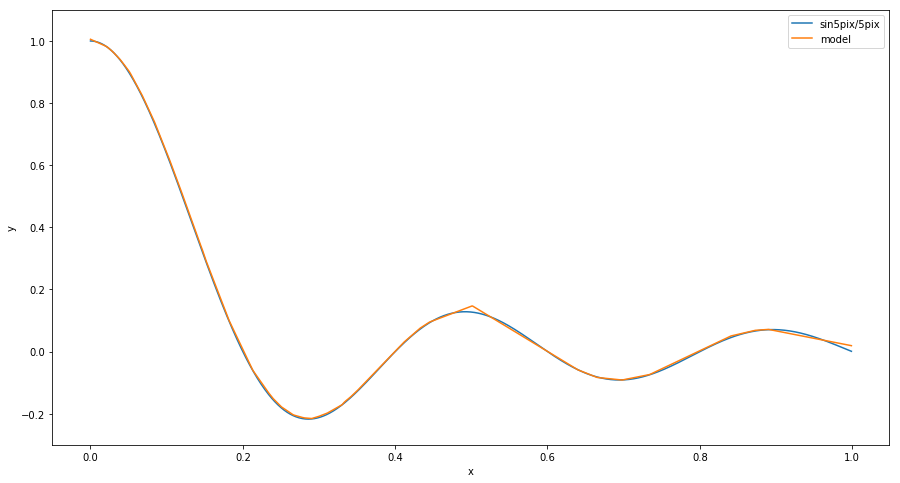

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(source, target, label="sin5pix/5pix")
plt.plot(source, prediction, label="model")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((-0.3, 1.1))
plt.legend(loc='best')
plt.show()

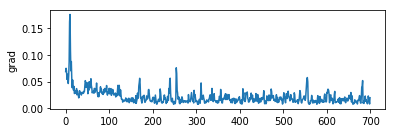

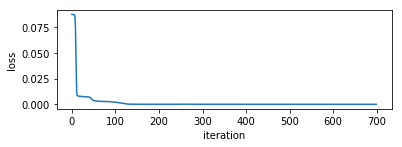

In [18]:
plt.figure(1)
plt.subplot(211)
plt.plot(np.arange(0, nm_epochs), grad_norm)
plt.ylabel('grad')

plt.figure(2)
plt.subplot(211)
plt.plot(np.arange(0, nm_epochs), loss_summary)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

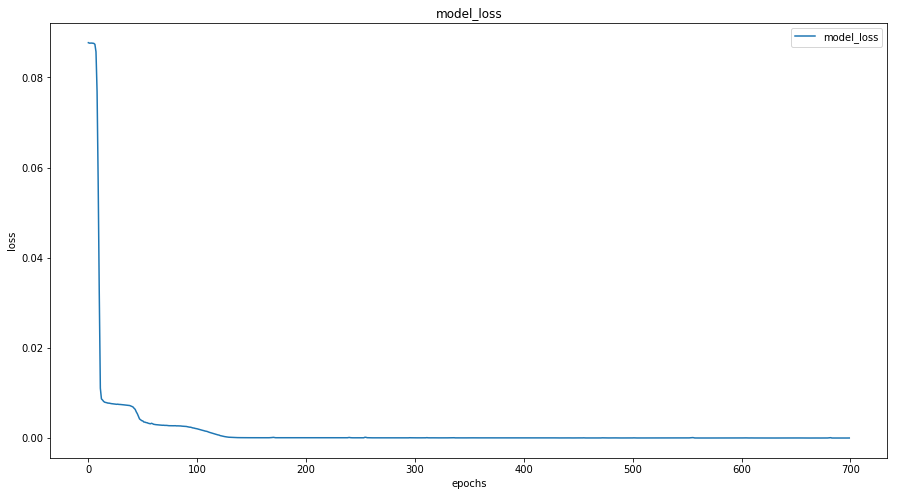

In [19]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, nm_epochs), loss_summary, label="model_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model_loss')
plt.legend(loc='best')
plt.show()

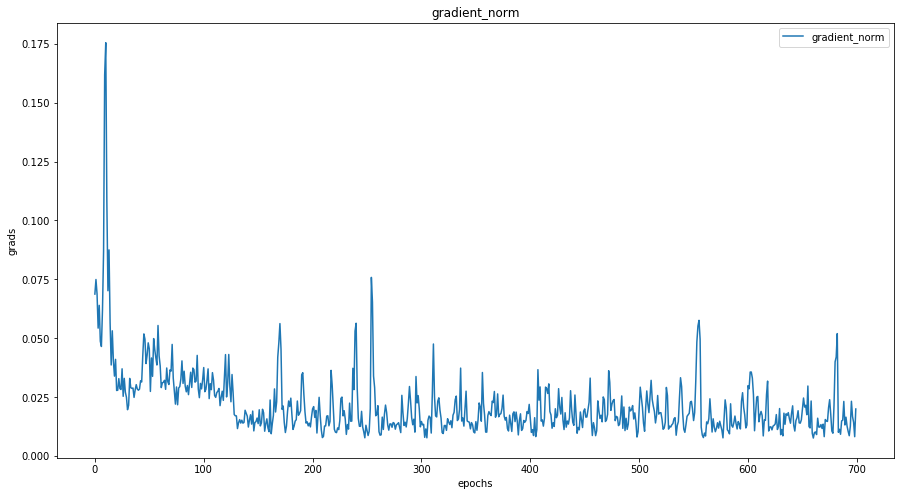

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, nm_epochs), grad_norm, label="gradient_norm")
plt.xlabel('epochs')
plt.ylabel('grads')
plt.title('gradient_norm')
plt.legend(loc='best')
plt.show()